CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  179
top         C0001  Lawrence Carroll  South America  2024-11-11

C:\Users\ASUS VIVOKBOOK\AppData\Local\Temp\ipykernel_23904\2738122725.py:41: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(customers_df.describe())


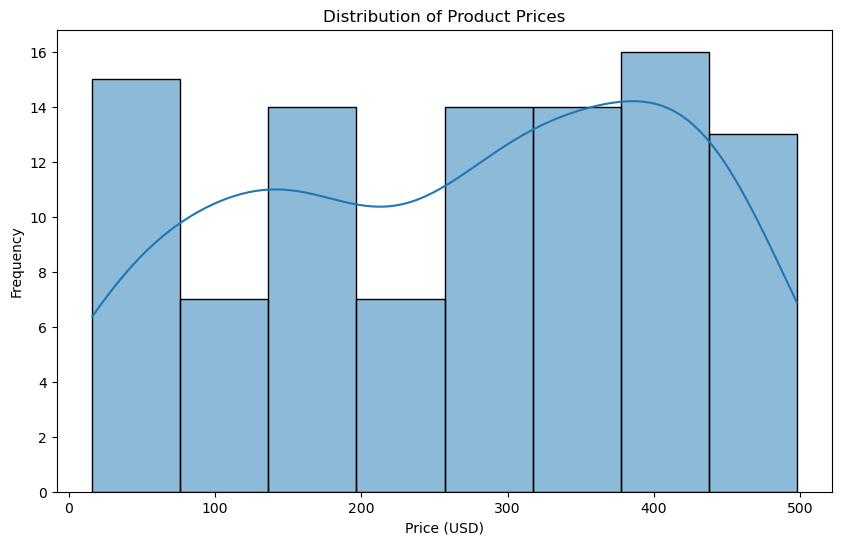

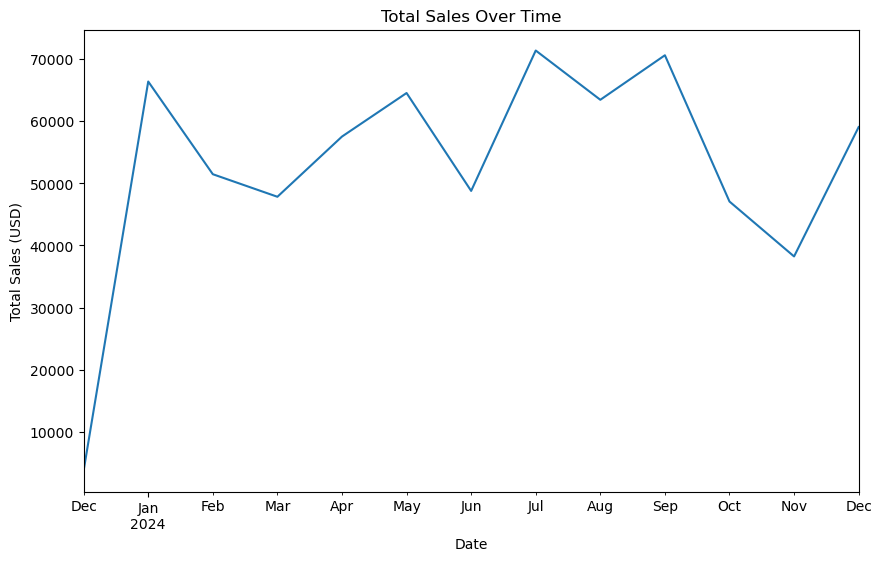

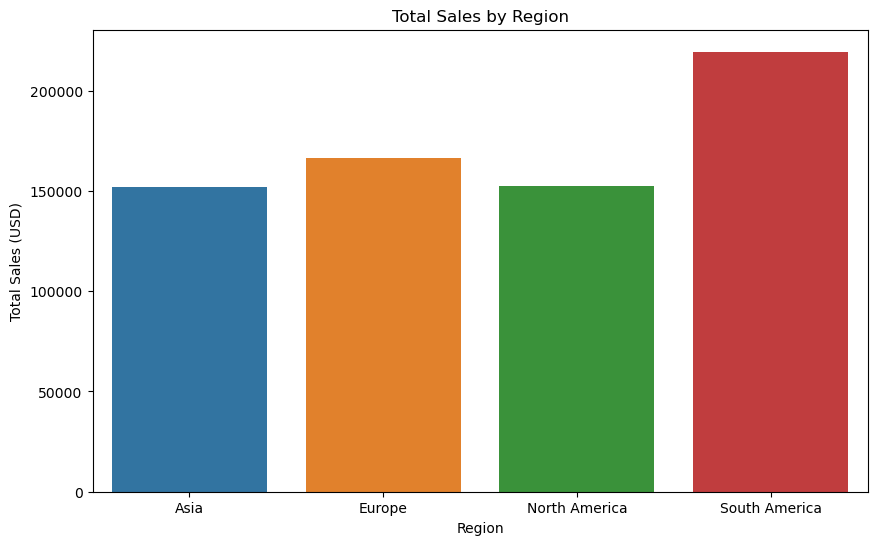

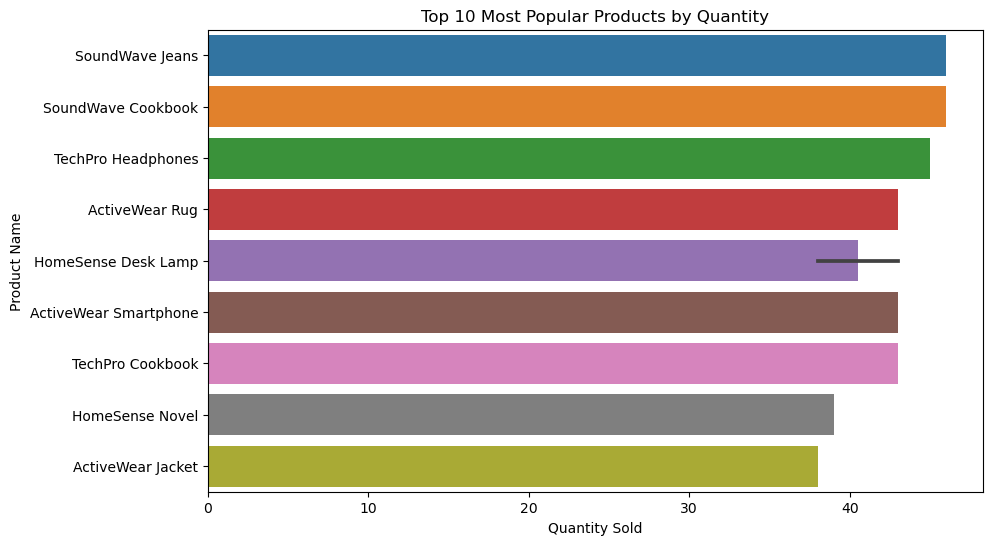

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

import pandas as pd

customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

customers_df.head(), products_df.head(), transactions_df.head()


customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')
print(customers_df.dtypes)
print(transactions_df.dtypes)
customers_df.head(), products_df.head(), transactions_df.head()


print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())


print(customers_df.duplicated().sum())
print(products_df.duplicated().sum())
print(transactions_df.duplicated().sum())

customers_df = customers_df.drop_duplicates()
products_df = products_df.drop_duplicates()
transactions_df = transactions_df.drop_duplicates()

print(customers_df.describe())
print(products_df.describe())
print(transactions_df.describe())

plt.figure(figsize=(10,6))
sns.histplot(products_df['Price'], kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


transactions_df['TotalValue'] = transactions_df['Quantity'] * transactions_df['Price']
monthly_sales = transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.show()


region_sales = customers_df.merge(transactions_df, on='CustomerID').groupby('Region')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='TotalValue', data=region_sales)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()


popular_products = transactions_df.groupby('ProductID')['Quantity'].sum().reset_index()
popular_products = popular_products.sort_values(by='Quantity', ascending=False)
popular_products = popular_products.merge(products_df[['ProductID', 'ProductName']], on='ProductID')

plt.figure(figsize=(10,6))
sns.barplot(x='Quantity', y='ProductName', data=popular_products.head(10))
plt.title('Top 10 Most Popular Products by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()
